Experimento preliminar: últimas pruebas

In [1]:
import numpy as np
import seaborn, math, os, random
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from copy import deepcopy

In [2]:
%run modelo.py
%run medidas_biodiversidad.py

In [3]:
files = []
with open('iteraciones.txt', 'r') as file:
    rows = file.readlines()
    for row in rows:
        files.append([row[:20], int(row[-2])])

In [4]:
all_condiciones_iniciales = [np.loadtxt("./comunidades/" + file[0][:20] + "-c.txt") for file in files]
all_tasas_reproduccion = [np.loadtxt("./comunidades/" + file[0][:20] + "-v.txt") for file in files]
all_matriz_interacciones = [np.loadtxt("./comunidades/" + file[0][:20] + '-m.txt') for file in files]

In [5]:
def modificar_matriz(m):
    for i in range(10):
        m[i][i] *= 15
    return m

def modificar_tasas(tasa):
    tasa[tasa > 0] = tasa[tasa > 0] * 20
    return tasa

def modificar_condiciones0(c0):
    c0 = c0 * 10
    return c0

In [6]:
matriz_interacciones = deepcopy(all_matriz_interacciones)
matriz_interacciones = [modificar_matriz(m) for m in matriz_interacciones]

tasas_reproduccion = deepcopy(all_tasas_reproduccion)
tasas_reproduccion = [modificar_tasas(tasa) for tasa in tasas_reproduccion]

condiciones_iniciales = deepcopy(all_condiciones_iniciales)
condiciones_iniciales = [modificar_condiciones0(c) for c in condiciones_iniciales]

In [7]:
random.seed(17)
comunidades = random.sample(range(201), 100)

In [8]:
comunidades = comunidades[:4]
comunidades

[133, 106, 77, 93]

## Experimento: comunidades originales
Parámetros

In [9]:
paisajes = np.load("./paisajes_h2.npy")

Dispersion = {"b": 0.3,
              "m": 1,
              "i": 1}

Mortalidad = {"b": 0,
              "m": 0.3,
              "i": 0.6}
t_total = 500

In [10]:
for c in comunidades:
    res = [None] * len(paisajes)
    for p in range(len(paisajes)):
        res[p] = matriz_agroecologica(paisajes[p].tolist(),
                                      matriz_interacciones[c], 
                                      tasas_reproduccion[c], 
                                      condiciones_iniciales[c],
                                      t_total, 
                                      Dispersion,
                                      Mortalidad)
        #res[p] = res[p][-3:]
        
    res = np.array(res)
    np.save("./datos/exp_prelim1_c{:03d}".format(c), res)

## Análisis de datos

In [70]:
poblacion = np.load('./datos/exp_prelim1_c077.npy')
poblacion = poblacion[0]
paisaje = paisajes[0].tolist()

biomasa_min = 5

# Biomasa paisaje
biomasa = [None] * len(poblacion)
riqueza = [None] * len(poblacion)

for i in range(len(poblacion)):
    biomasa[i] = riqueza_paisaje(poblacion, i, biomasa_min)[0] 
    riqueza[i] = riqueza_paisaje(poblacion, i, biomasa_min)[1]

riqueza_milpa = [None] * len(poblacion)
biomasa_milpa = [None] * len(poblacion)

for i in range(len(poblacion)):
    riqueza_milpa[i] = riqueza_agricola(poblacion, paisaje, i, biomasa_min)[1]   
    biomasa_milpa[i] = riqueza_agricola(poblacion, paisaje, i, biomasa_min)[0]   

<IPython.core.display.Javascript object>


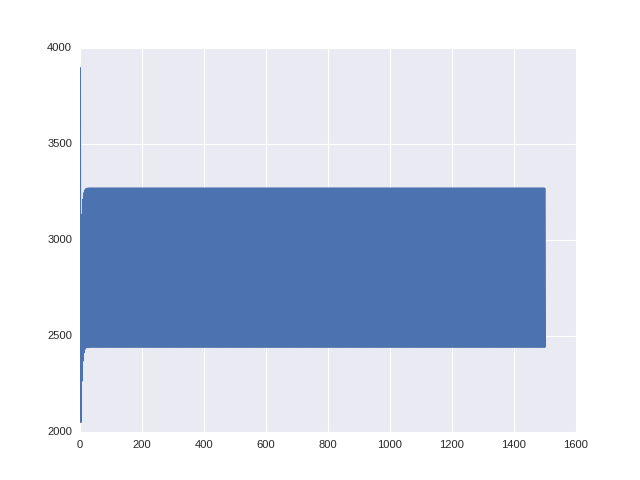

In [76]:
%matplotlib notebook
fig = plt.figure()
plt.plot(range(len(riqueza_milpa)), biomasa)
#plt.xlim(0, 4)

<IPython.core.display.Javascript object>


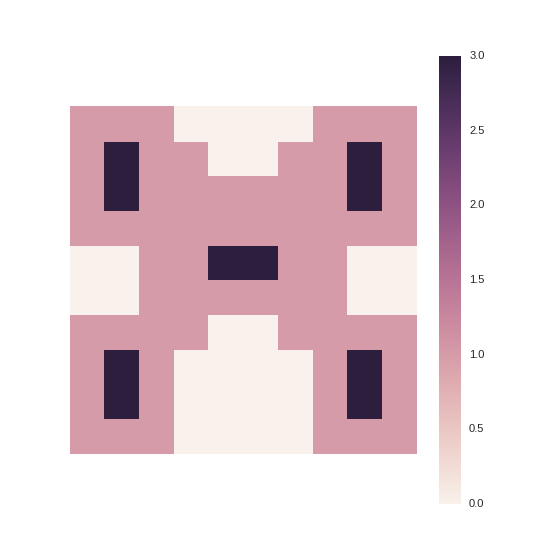

In [74]:
biomasa_celda = medidas_por_celda(poblacion, -1, biomasa_min)[0]
riqueza_celda = medidas_por_celda(poblacion, -1, biomasa_min)[1]

fig = plt.figure(figsize=(7,7))
seaborn.heatmap(riqueza_celda, yticklabels=False,
               xticklabels=False, vmin = 0.0, annot=True, fmt=".1f", square=True) 

#seaborn.heatmap(poblacion[-2, :, :, 1], yticklabels=False,
#               xticklabels=False, vmin = 0.0, annot=True, fmt=".1f", square=True) 
plt.show() 

In [17]:
biomasa_celda

array([[   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,  389.62040828,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
         389.62040828,    0.        ],
       [   0.        ,  389.62040828,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
         389.62040828,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
         389.62040828,  389.62040828,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0

In [20]:
sum(condiciones_iniciales[77])

389.62040827576391